# Python and Julia: Two Languages with Complementary Strengths

### Python's Ecosystem
- 400,000+ packages with mature data science stack (NumPy, pandas, scikit-learn)
- Prioritizes readability and developer productivity
- Broad industry adoption with extensive documentation
- Limitations: performance bottlenecks, GIL restrictions, numerical computing speed

### Julia's Performance
- "Looks like Python, runs like C" - designed for high-performance scientific computing
- Just-in-time compilation approaches C/Fortran speeds
- First-class support for mathematical notation and parallelism
- Growing ecosystem (~8,500 packages) but less mature than Python's

## Why Combine Them?

### The Two-Language Problem
- Data scientists traditionally prototype in high-level language (Python, R, MATLAB)
- Then reimplement performance-critical sections in low-level language (C++, Fortran)
- Julia + Python integration offers a solution to this workflow challenge

### Ideal Integration Scenarios
- Use Python for data preparation, visualization, and ML frameworks
- Use Julia for computation-heavy algorithms and mathematical modeling
- Leverage Python's mature ecosystem while gaining Julia's performance benefits


By combining these languages, you get Python's accessibility and ecosystem with Julia's computational performance - the best of both worlds without complete rewrites.


# Setting Up the Environment

## 1. Installing Required Packages


### For Calling Julia from Python: pyjulia

From the Python side, the `julia` package (often referred to as PyJulia) enables calling Julia from Python.



In [1]:
! pip install julia

### Approach 1: Direct PyJulia Integration

In [2]:
# Import and initialize Julia
import julia
import time

# Create a Julia instance - disable compiled modules to avoid some common issues
jl = julia.Julia(compiled_modules=False)

# Import the Julia Main module
from julia import Main as jl

Basic usage

In [3]:
# Direct method - use the Julia object directly
result = jl.eval('1 + 1')
print(f"Result from Julia: {result}")

# Define Julia functions using raw string literals
jl.eval(r'''
function greet(name)
    return "Hello, " * name * " from Julia!"
end
''')

# Call the Julia function we just defined
# Use jl.greet directly to avoid namespace conflicts
greeting = jl.eval('greet("Python")')
print(greeting)


Result from Julia: 2
Hello, Python from Julia!


In [4]:
# If you need to make Python variables available to Julia:
jl.py_variable = 42
result = jl.eval('py_variable + 10')
print(f"Result: {result}")

Result: 52


In [5]:
# Define the Julia function using jl.eval
jl.eval('''
function calculate_pi(n)
    inside_circle = 0
    for i in 1:n
        x, y = rand(), rand()
        if x^2 + y^2 <= 1
            inside_circle += 1
        end
    end
    return 4 * inside_circle / n
end
''')

# Now we can call the Julia function directly from Python
n_samples = 1_000_000

# Time the Julia implementation
start_time = time.time()
pi_estimate_julia = jl.calculate_pi(n_samples)  # Direct call through Main
julia_time = time.time() - start_time

print(f"Julia Pi estimate: {pi_estimate_julia}")
print(f"Julia computation time: {julia_time:.4f} seconds")

Julia Pi estimate: 3.143372
Julia computation time: 0.0104 seconds


#### Comparing compute times between Julia and Python directly!

In [6]:
# For comparison, let's implement the same algorithm in Python
import random

def calculate_pi_python(n):
    inside_circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return 4 * inside_circle / n

# Time the Python implementation
start_time = time.time()
pi_estimate_python = calculate_pi_python(n_samples)
python_time = time.time() - start_time

print(f"Python Pi estimate: {pi_estimate_python}")
print(f"Python computation time: {python_time:.4f} seconds")
print(f"Julia is {python_time/julia_time:.1f}x faster")

Python Pi estimate: 3.14442
Python computation time: 0.1467 seconds
Julia is 14.0x faster


In [7]:
# Alternatively, using NumPy for vectorized approach in Python
import numpy as np

def calculate_pi_numpy(n):
    points = np.random.rand(n, 2)
    inside = np.sum(np.sum(points**2, axis=1) <= 1)
    return 4 * inside / n

# Time the NumPy implementation
start_time = time.time()
pi_estimate_numpy = calculate_pi_numpy(n_samples)
numpy_time = time.time() - start_time

print(f"NumPy Pi estimate: {pi_estimate_numpy}")
print(f"NumPy computation time: {numpy_time:.4f} seconds")
print(f"Julia is {numpy_time/julia_time:.1f}x faster than NumPy")

NumPy Pi estimate: 3.140564
NumPy computation time: 0.0345 seconds
Julia is 3.3x faster than NumPy


#### Passing Data Between Python and Julia

* Simple Data Types: The PyJulia interface automatically converts between basic Python and Julia types:


In [8]:
# Create a Python list and pass it to Julia
py_list = [1, 2, 3, 4, 5]
jl.py_list = py_list 
jl.eval('py_list = py_list')  # Make py_list available in Julia
jl.eval('println("Python list in Julia: ", py_list)')
jl.eval('println("Type in Julia: ", typeof(py_list))')

#trying a list of mixed types
py_list_2 = [1, 2.0, 3.0, 4, 5]
jl.py_list_2 = py_list_2 
jl.eval('py_list_2 = py_list_2')  # Make py_list available in Julia
jl.eval('println("Python list in Julia: ", py_list_2)')
jl.eval('println("Type in Julia: ", typeof(py_list_2))')

#trying a list of mixed types - with string
py_list_3 = [1, 2.0, 3.0, 4, "five"]
jl.py_list_3 = py_list_3
jl.eval('py_list_3 = py_list_3')  # Make py_list available in Julia
jl.eval('println("Python list in Julia: ", py_list_3)')
jl.eval('println("Type in Julia: ", typeof(py_list_3))')

# Create a NumPy array and pass it to Julia
py_array = np.array([[1, 2, 3], [4, 5, 6]])
jl.py_array = py_array  # Direct assignment
jl.eval('println("NumPy array shape in Julia: ", size(py_array))')
jl.eval('println("Type in Julia: ", typeof(py_array))')




Python list in Julia: [1, 2, 3, 4, 5]
Type in Julia: Vector{Int64}
Python list in Julia: Real[1, 2.0, 3.0, 4, 5]
Type in Julia: Vector{Real}
Python list in Julia: Any[1, 2.0, 3.0, 4, "five"]
Type in Julia: Vector{Any}
NumPy array shape in Julia: (2, 3)
Type in Julia: Matrix{Int64}


Julia computation took 0.4220 seconds


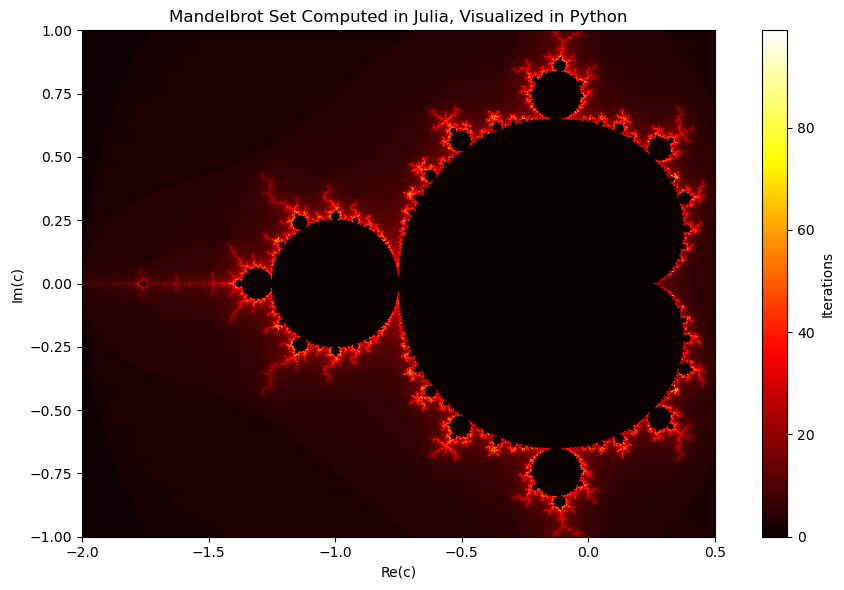

In [9]:
# Define a computation-heavy function in Julia
jl.eval('''
function compute_mandelbrot(h, w, max_iter)
    # Create a complex plane
    re = range(-2.0, 0.5, length=w)
    im_range = range(-1.0, 1.0, length=h)  # Renamed to avoid conflict
    
    # Preallocate output array
    mandelbrot_set = zeros(Int, h, w)
    
    # Compute the mandelbrot set
    for i in 1:h
        for j in 1:w
            c = re[j] + im_range[i] * im  # Now correctly using im as imaginary unit
            z = 0 + 0im
            for n in 1:max_iter
                if abs(z) > 2
                    mandelbrot_set[i, j] = n - 1
                    break
                end
                z = z^2 + c
            end
        end
    end
    
    return mandelbrot_set
end
''')

# Call the Julia function from Python with parameters
h, w = 1000, 1500
max_iter = 100

# Time the computation
import time
start = time.time()
mandelbrot = jl.compute_mandelbrot(h, w, max_iter)
end = time.time()
print(f"Julia computation took {end - start:.4f} seconds")

# Now we can use the result in Python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(mandelbrot, cmap='hot', extent=[-2, 0.5, -1, 1])
plt.colorbar(label='Iterations')
plt.title('Mandelbrot Set Computed in Julia, Visualized in Python')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.tight_layout()
plt.show()

### Approach 2: Using Julia Magic Commands

More seamless integration if you're switching between Python and Julia frequently. However, the Julia magic commands are quite finicky and often don't work well, especially with newer Python versions. 

In [10]:
# Load the Julia magic extension
#warnings about conflicting identifiers (like "import of MainInclude.eval into Main conflicts with an existing identifier"),
# these are generally harmless. They indicate that some Julia functions couldn't be directly imported into the Main namespace due to naming conflicts, 
# but you can still use them through alternative approaches
%load_ext julia.magic

# Use inline Julia code with %julia
%julia println("Hello from Julia using magic commands!")

Initializing Julia interpreter. This may take some time...
Hello from Julia using magic commands!


In [11]:
%%julia # has to be the very first line of the cell!
function calculate_pi(n)
    inside_circle = 0
    for i in 1:n
        x, y = rand(), rand()
        if x^2 + y^2 <= 1
            inside_circle += 1
        end
    end
    return 4 * inside_circle / n
end

estimate = calculate_pi(1_000_000)
println("π estimate: ", estimate)

π estimate: 3.144944

Data Exchange with Magic Commands: When using Julia magic commands, you can pass data between Python and Julia using special variable sharing:

This approach makes the workflow much cleaner when you need to frequently switch between languages. However, I was unable to get this to run do to the difficulty of running magic commands with newer python versions (I tried 3.12 and 3.11). 

Alternative approaches are... 
* Use the direct PyJulia approach instead of magic commands (shown in approach 1)
* Downgrade Julia to a version that might be more compatible with PyJulia 
    * My PyJulia is 0.6.2, and my Julia is 1.11.3. Downgrading to a around Julia 1.0-1.3 could help resolve the imcompatibility. 
* Upgrade PyJulia by trying to install the latest version (Already at the latest version in my case)

In [12]:
# Define variables in Python
x = [1, 2, 3, 4, 5]
y = 10

```python 
%%julia -i x,y

# Now we can use x and y in Julia
println("Python x in Julia: ", x)
println("Python y in Julia: ", y)
println("Sum of x + y: ", sum(x) + y)

# Create new variables in Julia that will be available in Python
result = [i^2 for i in 1:10]
squared_x = x.^2

# Print to see values in Julia
println("squared_x: ", squared_x)
println("result: ", result) 

*expected output*

```python
Python x in Julia: [1, 2, 3, 4, 5]
Python y in Julia: 10
Sum of x + y: 25

squared_x: [1, 4, 9, 16, 25]
result: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
```

``` python
# Access the Julia variables (will only work if you add -o to the cell magic)
print("Julia result in Python:", result)
print("Squared values:", squared_x)'''

## Best Practices for Calling Julia from Python

1. **Choose the Right Approach**:
   - **PyJulia Direct Integration**: Better for production code and complex projects
   - **Magic Commands**: More convenient for interactive work and notebooks
   - **Consider Your Audience**: Magic commands are more intuitive for demonstration purposes

2. **Minimize Crossing the Language Barrier**: 
   - Each time you call between languages, there's overhead
   - Do substantial work in each language before passing results

3. **Use Appropriate Data Types**:
   - NumPy arrays work well with Julia arrays
   - Dataframes might need special handling

4. **Handle Errors Gracefully**:
   - Julia errors in PyJulia can be hard to debug
   - Use try/except blocks to catch and handle errors

6. **Profile Before Optimizing**:
   - Don't assume Julia will always be faster
   - Benchmark to identify bottlenecks before moving code

7. **Magic Command Tips**:
   - Use `-i` to pass in Python variables
   - Use `-o` to get Julia results back to Python
   - For heavy computation, define the function with a cell magic and call it with line magic

This approach enables you to leverage Julia's performance while maintaining your Python workflow and ecosystem.

#### Additional time calling between the two languages 

In [15]:
# Define a computation-heavy function in Julia
jl.eval("""
function compute_pi_monte_carlo(n)
    inside_circle = 0
    for i in 1:n
        x, y = rand(), rand()
        if x^2 + y^2 <= 1
            inside_circle += 1
        end
    end
    return 4 * inside_circle / n
end

# Function to time Julia execution directly
function time_julia_direct(n, iterations)
    total_time = 0.0
    for i in 1:iterations
        start = time()
        result = compute_pi_monte_carlo(n)
        total_time += time() - start
    end
    return total_time / iterations
end
""")

# Number of points and iterations for fair comparison
n_points = 1_000_000
iterations = 5

# 1. Time the execution within Julia
julia_direct_time = jl.eval(f"time_julia_direct({n_points}, {iterations})")
print(f"Average time for direct Julia execution: {julia_direct_time:.6f} seconds")

# 2. Time the execution from Python calling Julia
python_call_times = []
for _ in range(iterations):
    start = time.time()
    result = jl.eval(f"compute_pi_monte_carlo({n_points})")
    python_call_times.append(time.time() - start)

avg_python_call_time = sum(python_call_times) / iterations
print(f"Average time for Python calling Julia: {avg_python_call_time:.6f} seconds")
print(f"Overhead ratio: {avg_python_call_time / julia_direct_time:.2f}x")

# 3. For comparison, implement the same algorithm in pure Python
def compute_pi_python(n):
    inside_circle = 0
    for _ in range(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return 4 * inside_circle / n

# Time the Python implementation
python_times = []
for _ in range(iterations):
    start = time.time()
    result = compute_pi_python(n_points)
    python_times.append(time.time() - start)

avg_python_time = sum(python_times) / iterations
print(f"Average time for pure Python: {avg_python_time:.6f} seconds")
print(f"Julia speedup over Python: {avg_python_time / julia_direct_time:.2f}x")
print(f"Python-Julia call speedup over Python: {avg_python_time / avg_python_call_time:.2f}x")

Average time for direct Julia execution: 0.002598 seconds
Average time for Python calling Julia: 0.002610 seconds
Overhead ratio: 1.00x
Average time for pure Python: 0.457665 seconds
Julia speedup over Python: 176.15x
Python-Julia call speedup over Python: 175.36x
